In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import scipy.stats as sts
%matplotlib inline

1.Загрузить файл hr.csv.

In [3]:
data_HR=pd.read_csv('итоговая_работа/HR.csv')
data_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [7]:
data_HR.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
print(data_HR.mode())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.1             0.55             4.0                   135   
1                 NaN              NaN             NaN                   156   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                 3.0            0.0   0.0                    0.0  sales   
1                 NaN            NaN   NaN                    NaN    NaN   

  salary  
0    low  
1    NaN  


In [11]:
data_HR.isnull().sum().sort_values(ascending = False)

salary                   0
sales                    0
promotion_last_5years    0
left                     0
Work_accident            0
time_spend_company       0
average_montly_hours     0
number_project           0
last_evaluation          0
satisfaction_level       0
dtype: int64

In [15]:
data_HR.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [33]:
#количество людей по уровням зарплат
data_HR.groupby('salary').count()[['satisfaction_level']].sort_values('satisfaction_level', ascending=False)

,satisfaction_level
salary,
low,7316
medium,6446
high,1237


In [50]:
#количество людей в каждом департаменте
data_HR.groupby('sales').count()[['satisfaction_level']].sort_values('satisfaction_level', ascending=False)

,satisfaction_level
sales,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [60]:
data_HR.groupby(['sales', 'salary']).count()[['satisfaction_level']].sort_values('sales', ascending=False)

satisfaction_level
sales       salary                    
technical   medium                1147
            low                   1372
            high                   201
support     medium                 942
            low                   1146
            high                   141
sales       medium                1772
            low                   2099
            high                   269
product_mng medium                 383
            low                    451
            high                    68
marketing   low                    402
            medium                 376
            high                    80
management  medium                 225
            low                    180
            high                   225
hr          medium                 359
            low                    335
            high                    45
accounting  medium                 335
            low                    358
            high                    74
RandD       medium                 372
            low                    364
            high                    51
IT          low                    609
            medium                 535
            high                    83

3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [12]:
correlation_matrix = data_HR.corr(method ='pearson').round(2)
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


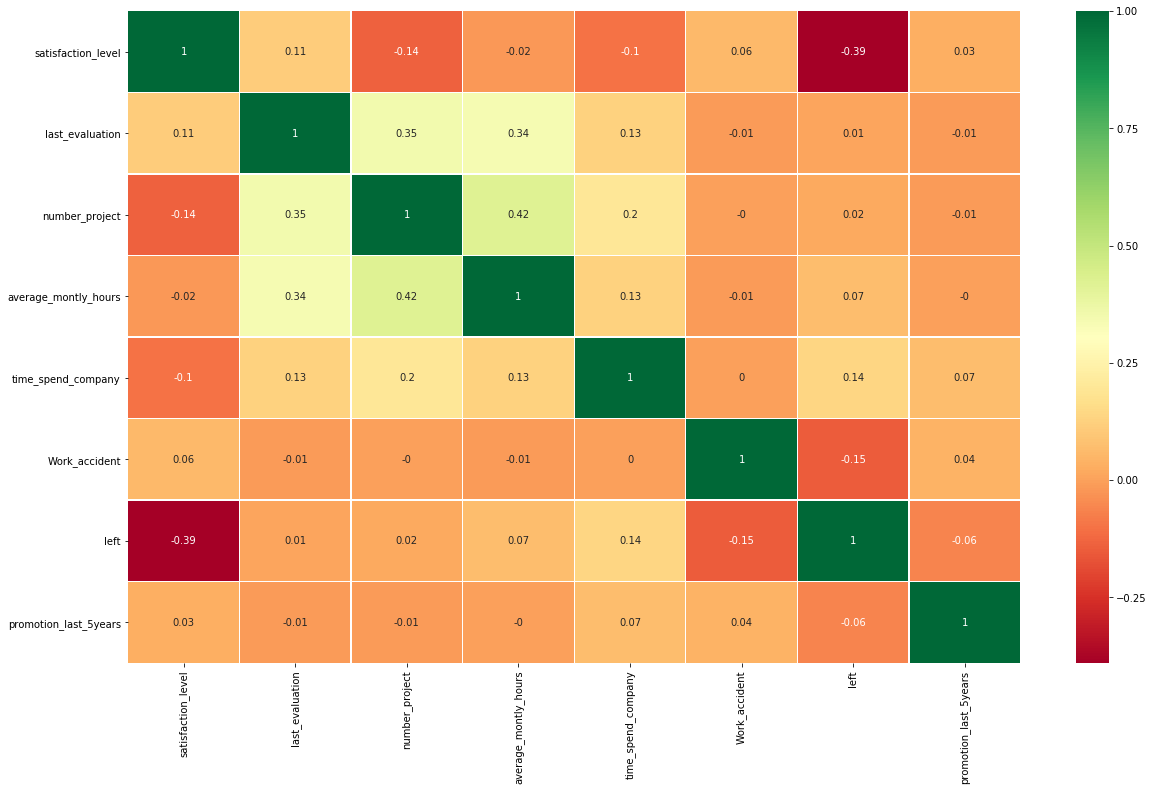

In [13]:
sns.heatmap(correlation_matrix,annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

Переменные слабо коррелированы между собой. 

4.Визуализировать несколько взаимосвязей между переменными.

d:\miniconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


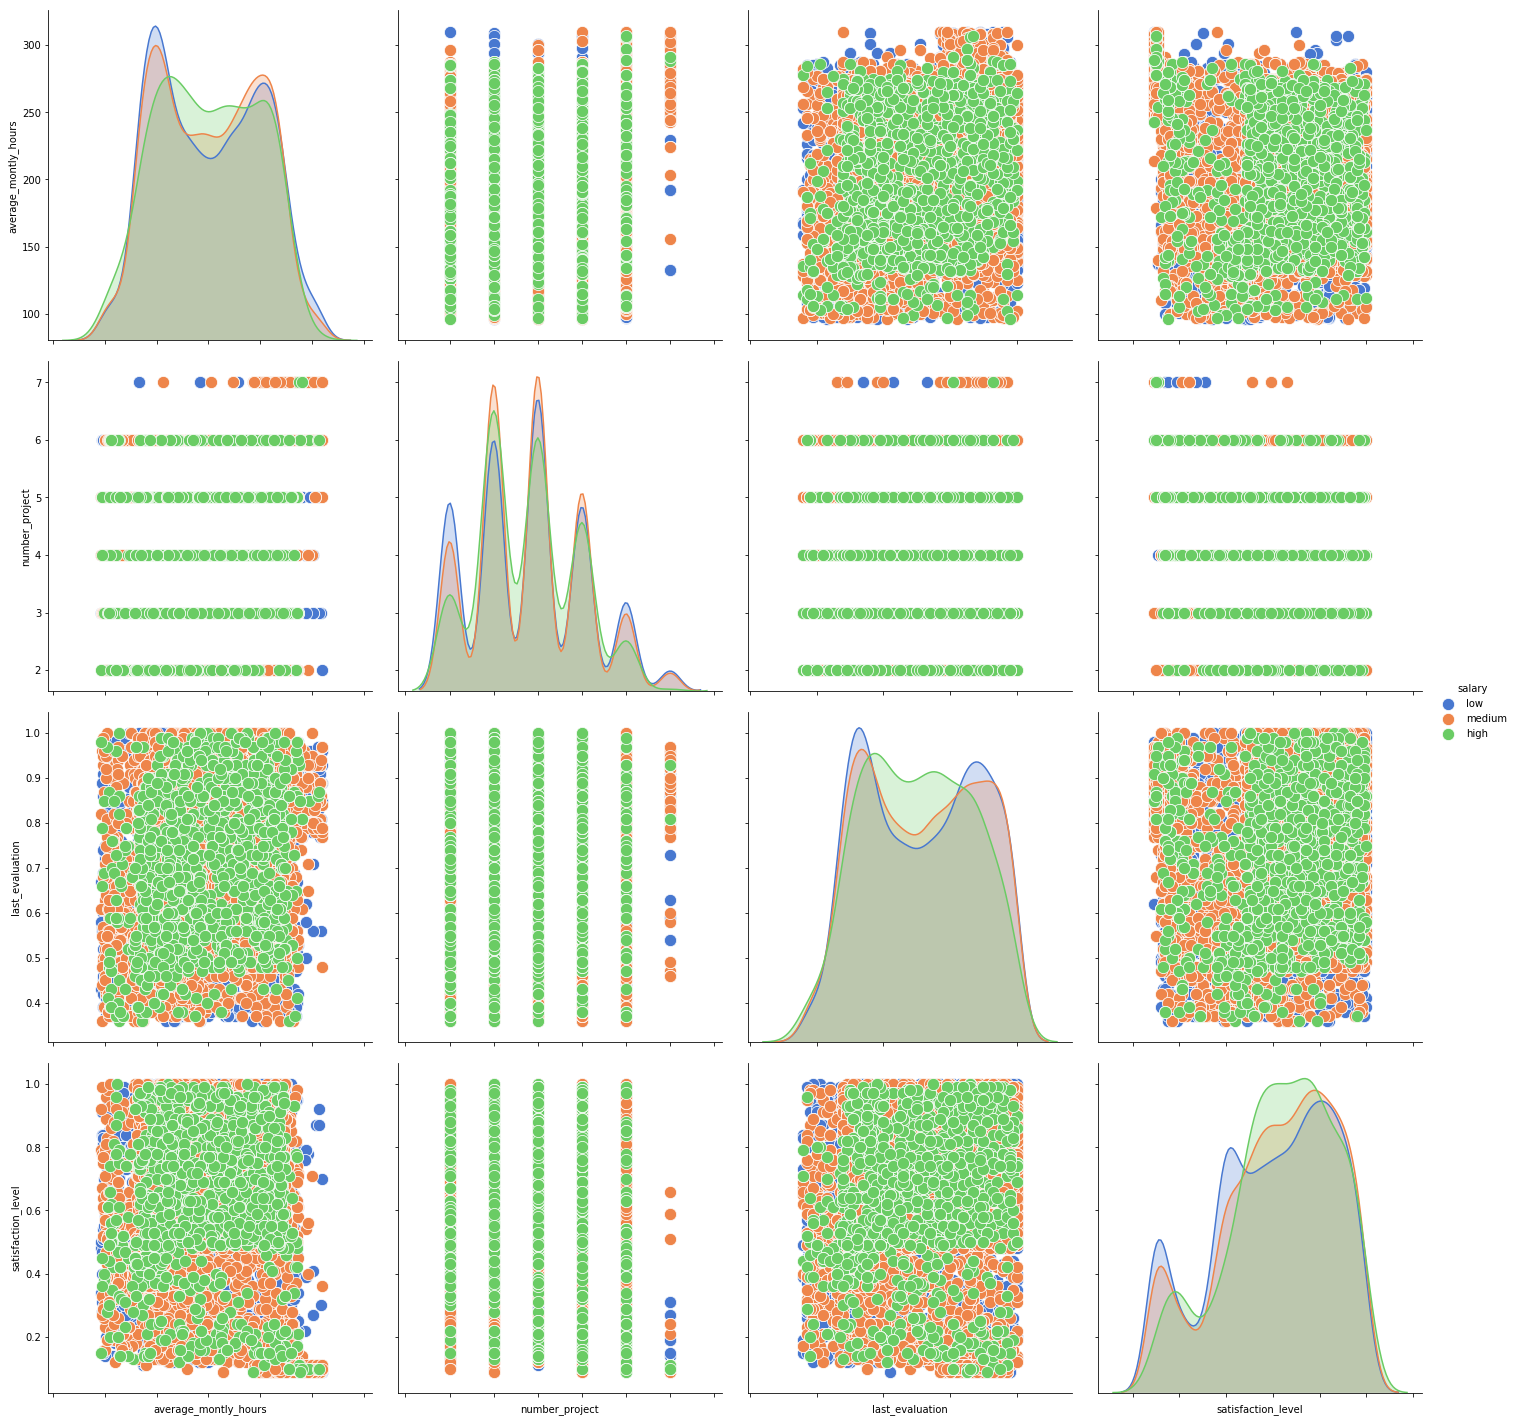

In [43]:

HR_g = sns.pairplot(data=data_HR[['average_montly_hours',  'number_project', 'last_evaluation', 'satisfaction_level','salary']], hue='salary', palette = 'muted',
                 size=5.,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=150) )
HR_g.set(xticklabels=[])

И визуально связей между переменным тоже нет.

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

Я решила проверить, отличается ли средний уровень удовлетворенности между группами с низкой зарплатой и средней. Нулевая гипотеза - средние по выборкам не отличаются.

In [47]:
data_HR_low_salary=data_HR[data_HR['salary'] == 'low']
data_HR_low_salary.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


In [61]:
data_HR_medium_salary=data_HR[data_HR['salary'] == 'medium']
data_HR_medium_salary.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
60,0.85,0.91,5,226,5,0,1,0,management,medium
61,0.11,0.93,7,308,4,0,1,0,IT,medium
62,0.10,0.95,6,244,5,0,1,0,IT,medium


In [62]:
stats.ttest_ind(data_HR_low_salary['satisfaction_level'].sample(n=6400), data_HR_medium_salary['satisfaction_level'].sample(n=6400))

Ttest_indResult(statistic=-4.3159165552741365, pvalue=1.601361464107373e-05)

p-value меньше уровня значимости, а это означает, что можно отвергнуть нулевую гипотезу, и выборки имеют разные средние

А можно еще проверить, отличается ли средний уровень удовлетворенности между группами продажников с низкой зарплатой и средней .

In [51]:
data_HR_low_salary_sales=data_HR_low_salary[data_HR_low_salary['sales'] == 'sales']
data_HR_low_salary_sales.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


In [53]:
data_HR_low_salary_sales.shape

(2099, 10)

In [63]:
data_HR_medium_salary_sales=data_HR_medium_salary[data_HR_medium_salary['sales'] == 'sales']
data_HR_medium_salary_sales.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
99,0.90,1.00,5,221,6,0,1,0,sales,medium
100,0.38,0.52,2,154,3,0,1,0,sales,medium
101,0.36,0.52,2,147,3,0,1,0,sales,medium


In [65]:
data_HR_medium_salary_sales.shape

(1772, 10)

In [66]:
stats.ttest_ind(data_HR_low_salary_sales['satisfaction_level'].sample(n=1700), data_HR_medium_salary_sales['satisfaction_level'].sample(n=1700))

Ttest_indResult(statistic=-3.0691490001516906, pvalue=0.002163638720519006)

p-value опять ниже уровня значимости, а это означает, что можно отвергнуть нулевую гипотезу, и выборки имеют разные средние

6.Рассчитать сколько работников работает в каждом департаменте.

In [70]:
data_HR_group_by_sales=data_HR.groupby('sales').count()[['satisfaction_level']].reset_index().sort_values('satisfaction_level', ascending=False)
data_HR_group_by_sales

,sales,satisfaction_level
7,sales,4140
9,technical,2720
8,support,2229
0,IT,1227
6,product_mng,902
5,marketing,858
1,RandD,787
2,accounting,767
3,hr,739
4,management,630


7.Показать распределение сотрудников по зарплатам.

In [84]:
data_HR_group_by_salary=data_HR.groupby('salary').count()[['satisfaction_level']].reset_index().sort_values('satisfaction_level', ascending=False)
data_HR_group_by_salary

,salary,satisfaction_level
1,low,7316
2,medium,6446
0,high,1237


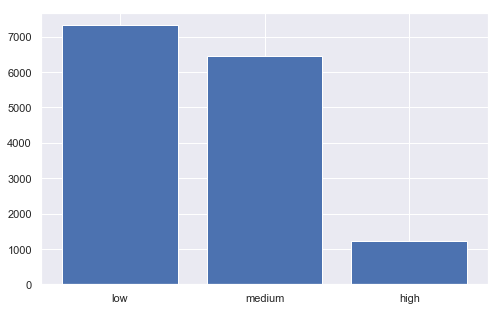

In [86]:
ax = plt.gca()
ax.bar(data_HR_group_by_salary['salary'], data_HR_group_by_salary['satisfaction_level'])
ax.set_xticks(data_HR_group_by_salary['salary'])

plt.show()


8.Показать распределение сотрудников по зарплатам совместно с департаментами.

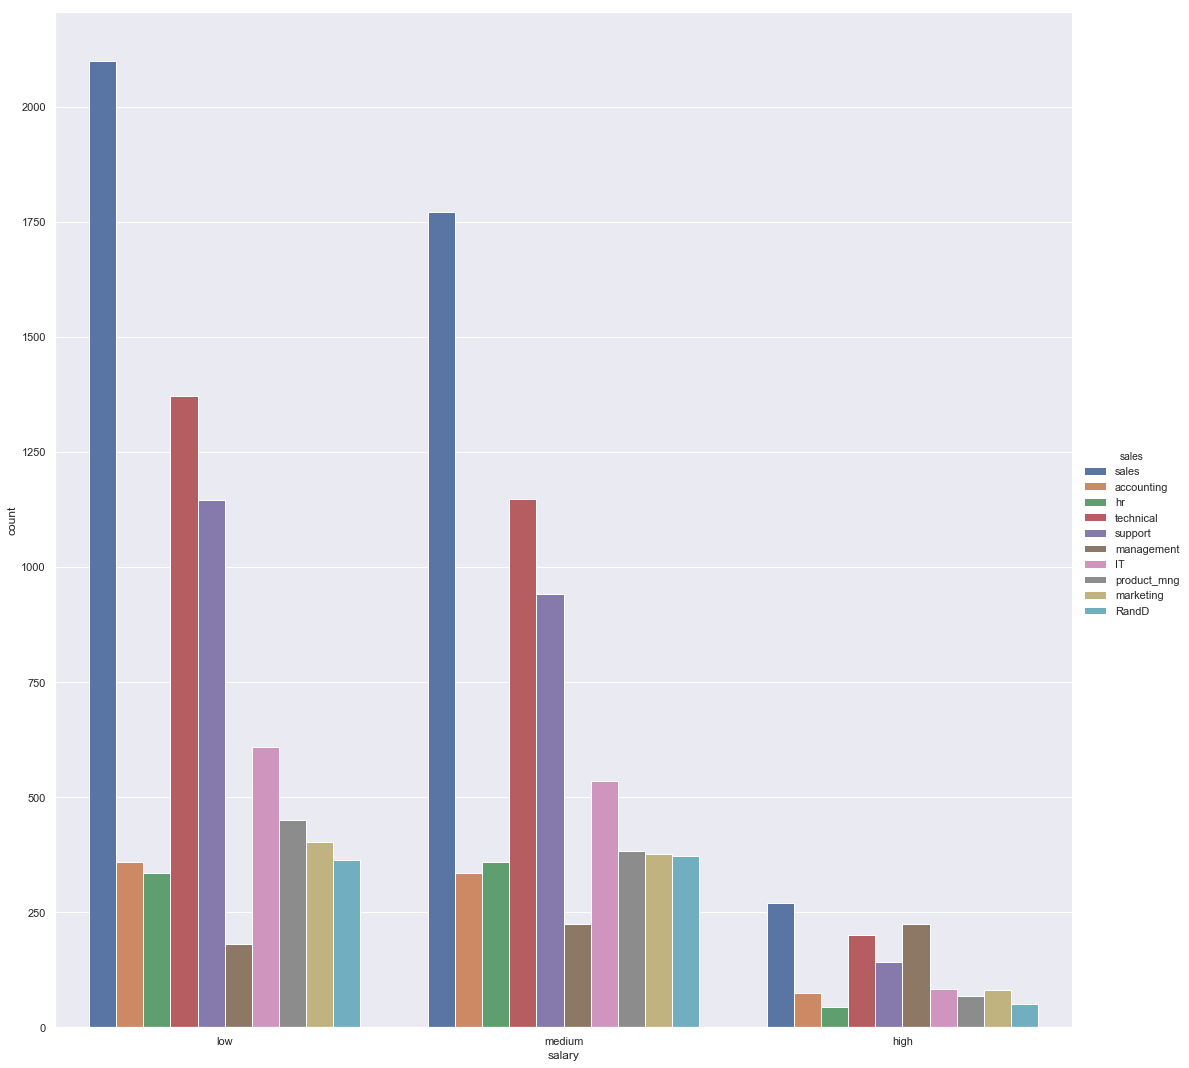

In [99]:
sns.catplot(x="salary", hue="sales", kind="count",
            data=data_HR, height=15);

9.Сколько сотрудников покинули компанию.

In [100]:
data_HR.groupby('left').count()[['satisfaction_level']].sort_values('satisfaction_level', ascending=False)

,satisfaction_level
left,
0,11428
1,3571


Покинули 3571 сотрудник

10.Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию.

Посмотрим распределение по уровню удовлетворенности работой из разных зарплатных категорий среди тех, кто остался, и тех, кто уволился

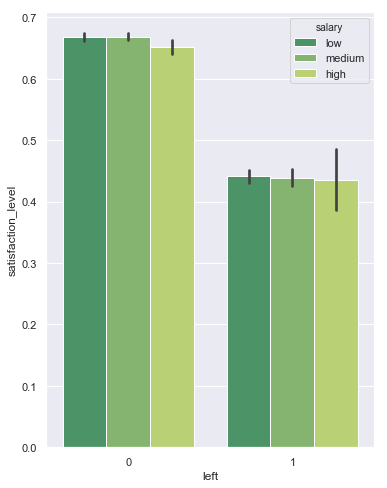

In [132]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='left',y='satisfaction_level',data=data_HR,hue='salary',palette='summer')

plt.show()

По графикам видно, что нет особой разницы между удовлетворенностью среди тех, кто остался. Хотя у сотрудников с высокой зп уровень удовлетворенности немного ниже. Но большая разница в удовлетворенности между теми, кто остался и теми, кто уволился. Уволившиеся видимо не очень были довольны своей работой.

Может быть они много работали, но не получали повышение?

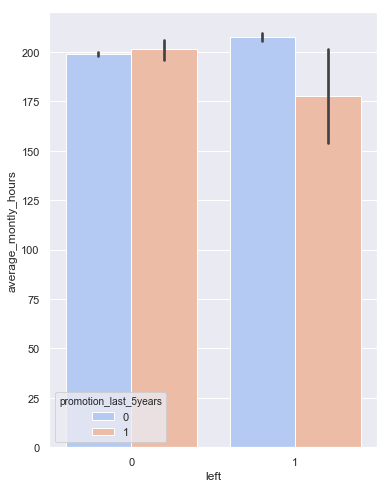

In [119]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='left',y='average_montly_hours',data=data_HR,hue='promotion_last_5years',palette='coolwarm')

plt.show()

И действительно, среднее количество рабочих часов в месяц больше у тех, кто уволились, так и не получив повышения.

Может быть они долго работали в кампании, но их не повышали?

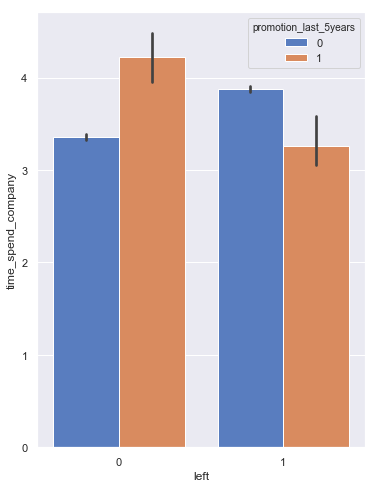

In [120]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='left',y='time_spend_company',data=data_HR,hue='promotion_last_5years',palette='muted')

plt.show()

На графике видно, что дольше всех остаются работать те, кто получает повышение. А те, кто уволился, тоже работали в компании долго, но повышения не получили.

Может у уволившихся было мало проектов?

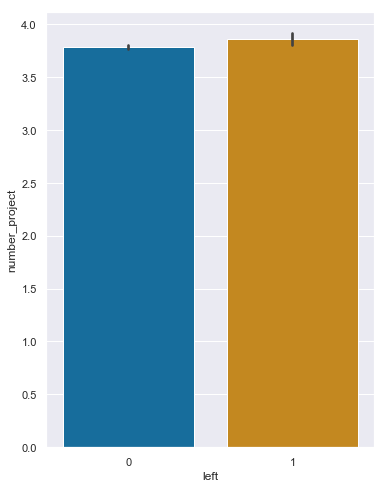

In [126]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='left',y='number_project',data=data_HR,palette='colorblind')

plt.show()

У уволившихся было даже больше проектов.

Еще можно проверить, по какому департаменту большая разница в отработанных часах среди оставшихся и уволившихся.

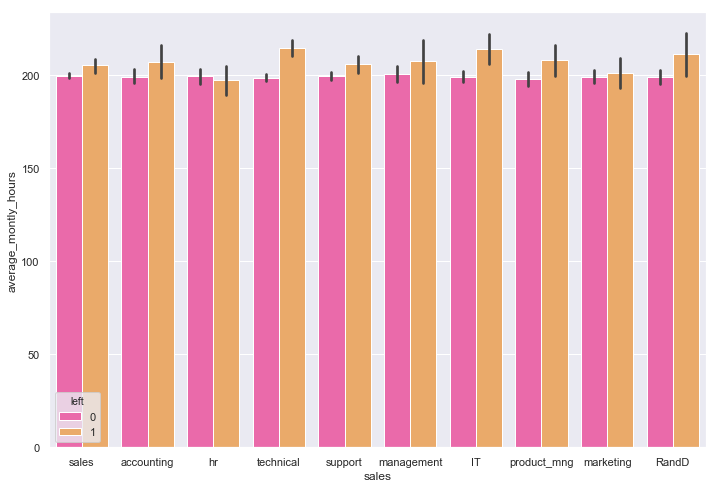

In [130]:
plt.figure(figsize=(40,8))
plt.subplot(1, 3, 1)
sns.barplot(x='sales',y='average_montly_hours',data=data_HR,hue='left',palette='spring')

plt.show()

Видно, что больше всех работали уволившиеся техники, it и rand.

По датасету можно сделать вывод, что сотрудники увольняются из-за того, что не получают повышение, хотя работают долго, в среднем работают больше часов в месяц и имеют больше рабочих проектов. При этом их удовлетворенность работой ниже.